# Изучение рынка компьютерных игр.

### Описание проекта:

Мы работаем в интернет магазине "Стримчик" , который продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и т.д. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нам нужно отработать принцип работы с данными. И спрогнозировать продажи на 2017 год или на 2023 год.

### Обзор данных:

Описание данных:
Name — название игры;
Platform — платформа;
Year_of_Release — год выпуска;
Genre — жанр игры;
NA_sales — продажи в Северной Америке (миллионы проданных копий);
EU_sales — продажи в Европе (миллионы проданных копий);
JP_sales — продажи в Японии (миллионы проданных копий);
Other_sales — продажи в других странах (миллионы проданных копий);
Critic_Score — оценка критиков (максимум 100);
User_Score — оценка пользователей (максимум 10);
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию;
Данные за 2016 год могут быть неполными.

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats as st

In [2]:
#чтение файла
data = pd.read_csv('/datasets/games.csv', sep=',')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

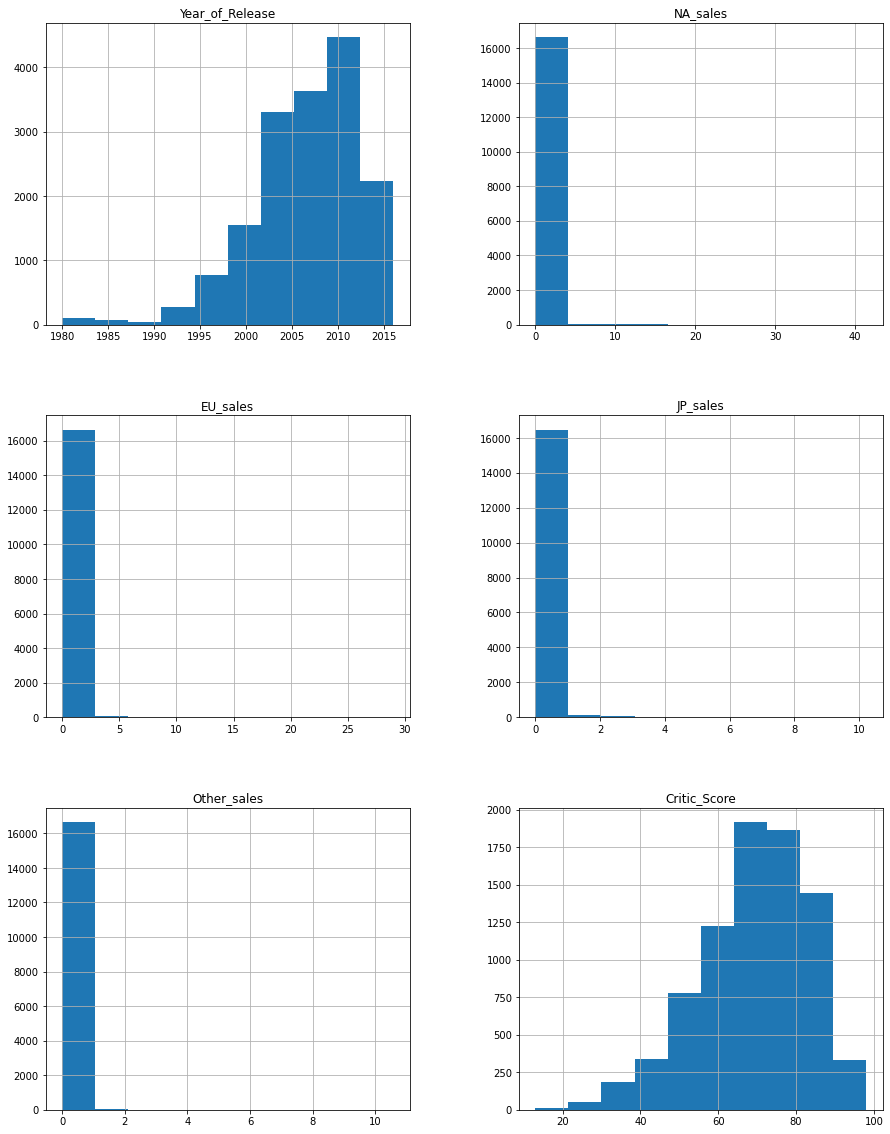

In [3]:
#выведем информацию и гистограммы, чтобы получить информацию
data.info()
data.hist(figsize=(15, 20))

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.sample(random_state = None, n = 5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7337,Code Name: S.T.E.A.M.,3DS,2015.0,Strategy,0.14,0.05,0.01,0.02,69.0,7.7,T
3303,Sacred 2: Fallen Angel,PS3,2009.0,Role-Playing,0.22,0.22,0.08,0.09,70.0,7.1,M
838,PGR4 - Project Gotham Racing 4,X360,2007.0,Racing,0.48,1.28,0.02,0.25,NaN,NaN,NaN
3842,NBA Live 09,PS3,2008.0,Sports,0.46,0.00,0.02,0.04,75.0,7.8,E
6659,Ultimate Fighting Championship,PS,2000.0,Fighting,0.14,0.09,0.00,0.02,53.0,7.4,T


#### Вывод: 
- названия столбцов привести к одному формату букв (str);
- необходимо обработать пропуски данныз в столбцах: Сritic_score, User_Score, Rating, Year_of_Release; 
- в user_score надо исправить аббревиатуру;

### Предобработка данных

In [6]:
#приведем названия столбцов к единому регистру
data.columns = data.columns.str.lower()
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
#выведем строки с 'tbd'
data.query('user_score =="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [8]:
#Разберем аббревиатуру "tbd" - обозначает to be determined - данные будут определены. Думаю, стоит их заменить на 'NaN'.
data.loc[data['user_score']=="tbd", 'user_score']=np.NaN
data['user_score'].unique()
data['user_score'] = data['user_score'].astype('float')

In [9]:
(data['user_score']).describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [10]:
#проведем анализ пропусков:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
#пропуски в дате выхода игр: сделаем свод по пропускам
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#пропуски удаляем в столбце "year_of release",можно было бы заменить на год в имени, но мы не уверенны в этом, насколько это правильно
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')
#преобразуем в формат даты:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'],errors='ignore')
data.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
#пропуски в названиях игр и в названии жанра:
data.query('name.isna()')
data.query('genre.isna()')
#удаление пропусков в названии игр и в названии жанра:
data.dropna(subset=['name','genre'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Комментарий: Пропуски в critic_score, user_score, rating теоретически можно заполнить по среднему значению, но это не будет корректно, так как , игры разные, и разные рейтинги.

In [14]:
#Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
data['sales_summary'] = data['na_sales']+data['eu_sales']+ data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_summary
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Комментарий студента: Спасибо, этот код быстрее писать:)

In [15]:
#проверка на наличие дубликатов:
data.duplicated().sum()

0

Опишем причины, которые привели к пропускам:
Причинами появления пропусков могут быть и ошибки выгрузки данных и человеческих фактор и что-то другое.
Судя по википедии индекс ESRB применяется только в США и Канаде, поэтому, если игры выпускали не в этих странах, то они могли и не получить этот рейтинг.
Согласно заданию проекта, нам также нужно добавить новый столбец с суммарными продажами во всех регионах.
Проведя работу по заполнению данных были пропуски в столбце name. Их мало и данные по 1993 году. Самое начало игр, возможно просто что-то малоизвестное и данных действительно уже не найти. Просто пропуски удалены.

In [16]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sales_summary    16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Комментарий:
Пропуски в колонке рейтинг действительно не несут ошибки. Этот рейтинг ESRB актуален только для США и Канады. И по идее можно по среднему рейтингу заполнить рейтинги в других странах, но информация будет не совсем корректная, поэтому оставила так.

#### Вывод:
- Привели названия столбцов к нижнему регистру;
- Обработали аббревиатуру "tbd" (означает данные не будут определены  - to be determined) в столбце "user_score" поменяли на NaN;
- Обработали пропуски в столбцах: "year_ of_release", "name", "genre";
- Пропуски оставлены в столбцах: "critic_score", "user_score", "rating" (из-за того, что critic_score и user_score невозможно найти информацию по оценке критиков и оценке пользователей и при этом кол-во пропусков незначительное, по rating будет проведена доп. обработка ниже);
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец; 
- Проверили на кол-во дубликатов, они отсутствуют.

### Исследовательский анализ:

#### Анализ периодов по продажам игр, которые выпускались в разные годы, анализ продаж по платформам, определение актуального периода продаж.

In [17]:
#Составим таблицу игр и сколько их выпускалось в разные годы:q
year_of_release = data.groupby('year_of_release')['name'].count().reset_index()
year_of_release.columns = ['year', 'count']
year_of_release

,year,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [18]:
#рассмотрим по убыванию:
data.year_of_release.value_counts().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


<AxesSubplot:>

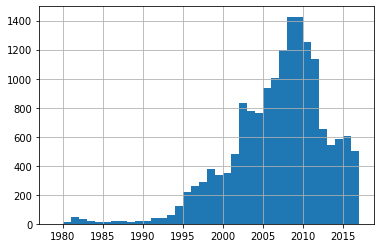

In [19]:
#Построим графики выпуска игр по годам:
data['year_of_release'].hist(bins = 38, range=(1979, 2017))

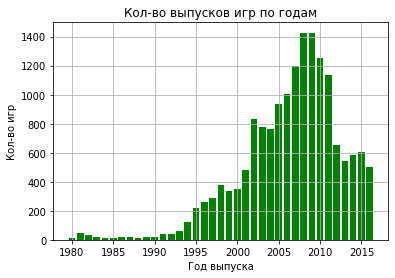

In [20]:
#попробуем гистограмму распределить по годам:
plt.bar(year_of_release['year'], year_of_release['count'], label='Кол-во выпусков в год', color='g')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во игр')
plt.grid()
plt.title(f'Кол-во выпусков игр по годам')
plt.show();

Вывод:
Cудя по кол-ву игр, самый высокий сезон по выпуску игр -  2008 и 2009 года.Но вообщем игры выпускались с 1995 по 2016 год.
А с 1979 года по 1994 год начало выпуска игр, но по значениям очень мало кол-во. Скорее всего велась разработка, а выпуска игр, как такового не было.

,platform,sales_summary
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


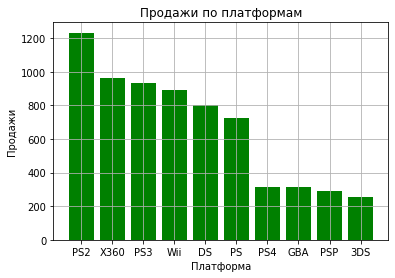

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [21]:
#Проанализируем как менялись продажи игр по платформам:
data_platforms = data.groupby(['platform']).agg({'sales_summary':'sum'}).sort_values(by='sales_summary',ascending=False)\
.reset_index().head(10)
display(data_platforms)

plt.bar(data_platforms['platform'], data_platforms['sales_summary'], label='Продажи по платформам', color='g')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.grid()
plt.title(f'Продажи по платформам')
plt.show();

top_ten_platforms = data_platforms['platform'].to_list()
display(top_ten_platforms)

In [22]:
#Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
data_new_top = data.query('platform in @top_ten_platforms')
data_new_top.tail(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_summary
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01


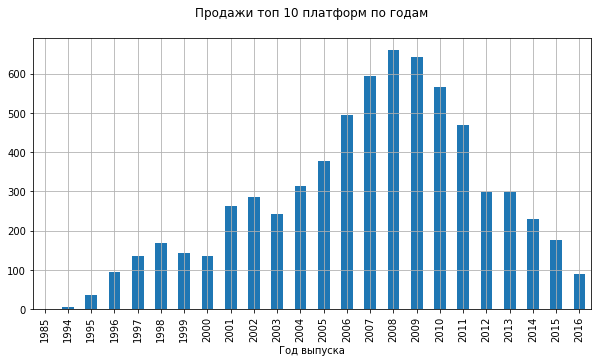

In [23]:
data_new_top.groupby('year_of_release')['sales_summary'].sum().plot(x='year_of_release', y='sales_summary', kind='bar', figsize=(10,5))
plt.title('Продажи топ 10 платформ по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

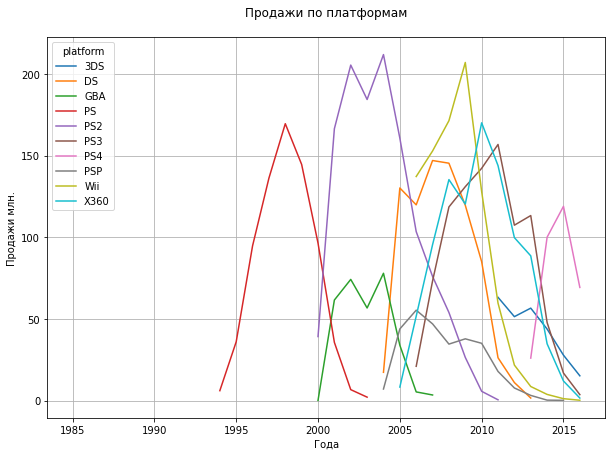

Среднее кол-во лет: 11.0


In [24]:
#Рассмотрим за какой характерный срок появляются новые и исчезают старые платформы:
#1.Посмотрим распределение по годам для каждой отдельной платформы с помощью гистограммы:
pd.pivot_table(data_new_top , index='year_of_release', columns='platform', values='sales_summary', aggfunc='sum')\
.plot(figsize=(10,7))
plt.grid(True)
plt.title('Продажи по платформам\n  ')
plt.xlabel('Года')
plt.ylabel('Продажи млн.')
plt.show()

#2.найдем существование платформ по годам:

data_new_top_years = data_new_top.groupby(['platform', 'year_of_release']).agg({'sales_summary':'sum'}).reset_index()
data_new_top_years['platform'].value_counts()
print('Среднее кол-во лет:',(data_new_top_years['platform'].value_counts()).median())


Вывод:
В среднем топ 10 платформ существует 11 лет в период с 1994 по 2016 год (PS4 - 4 года, 3DS - 6 лет (исключение в годах))
В среднем с 1996 года начинаются продажи игр на платформах, что и подтверждает предыдущий вывод.

In [25]:
#Определим самостоятельно актуальный период, чтобы с помощью него можно было построить прогноз на 2017 год:
#средний срок жизни платформ прримерно 11 лет, поэтому для прогноза на 2017 год возьмем предыдущий период за 11 лет (с 2005 года)
data.query('2017 > year_of_release > 2005')\
.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,-,-,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0
DC,-,1.0,1.0,-,-,-,-,-,-,-,-
DS,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-
GBA,39.0,6.0,-,-,-,-,-,-,-,-,-
GC,40.0,4.0,-,-,-,-,-,-,-,-,-
PC,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,259.0,214.0,191.0,96.0,38.0,7.0,-,-,-,-,-
PS3,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,-,-,-,-,-,-,-,16.0,75.0,137.0,164.0


<AxesSubplot:xlabel='year_of_release'>

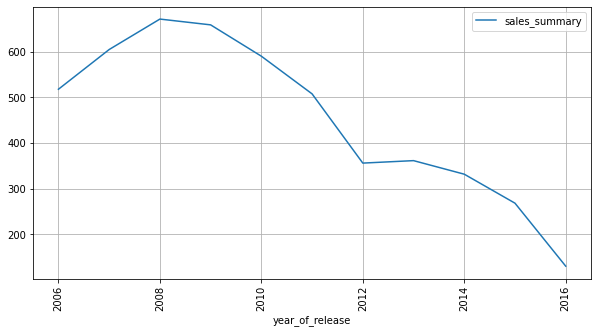

In [26]:
data.query('year_of_release > 2005')\
.pivot_table(index='year_of_release', values='sales_summary', aggfunc='sum')\
.plot(use_index=True, y='sales_summary', grid=True,figsize=(10, 5),rot=90)

##### Вывод по определению актуального периода:
Рынок игр стремительно меняется, это видно, что с 2011 года, старые платформы перестают свое действие, а на замену к ним приходят новые, хоть и общая стоимость продаж в прошлые года была больше судя по графику, ну лучше брать в расчет новые актуальные цифры. Поэтому скорее всего лучше взять актуальные платформы с 2012 года и на основании них, строить прогноз 2017 года. см.ниже

In [27]:
data.query('2017 > year_of_release > 2011')\
.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,93.0,91.0,80.0,86.0,46.0
DS,23.0,8.0,-,-,-
PC,61.0,38.0,47.0,50.0,54.0
PS3,148.0,126.0,108.0,73.0,38.0
PS4,-,16.0,75.0,137.0,164.0
PSP,106.0,54.0,10.0,3.0,-
PSV,53.0,63.0,100.0,110.0,85.0
Wii,31.0,12.0,6.0,4.0,1.0
WiiU,32.0,42.0,31.0,28.0,14.0


#### Анализ платформ, которые лидируют по продажам, на основании несколько потенциальных прибыльных платформ.

<function matplotlib.pyplot.show(close=None, block=None)>

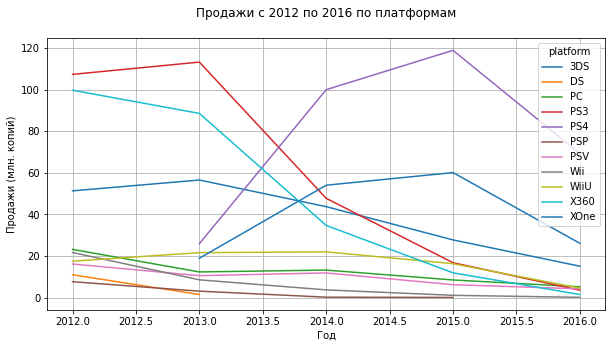

In [28]:
#Рассмотрим: Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
pd.pivot_table(data.query('2017 > year_of_release > 2011'), index='year_of_release', columns='platform', values='sales_summary', aggfunc='sum').plot(figsize=(10,5))
plt.grid(True)
plt.title('Продажи с 2012 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.show


In [29]:
#Как мы видим на графике, все платформы теряют в продажах.
#Шанс улучшить показатели продаж есть у PS4, PC, PSV, XOne и WiiU.
#Наилучшие перспективы у платформ PS4 и XOne.
#Следовательно выявим топ 5 платформ:
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']

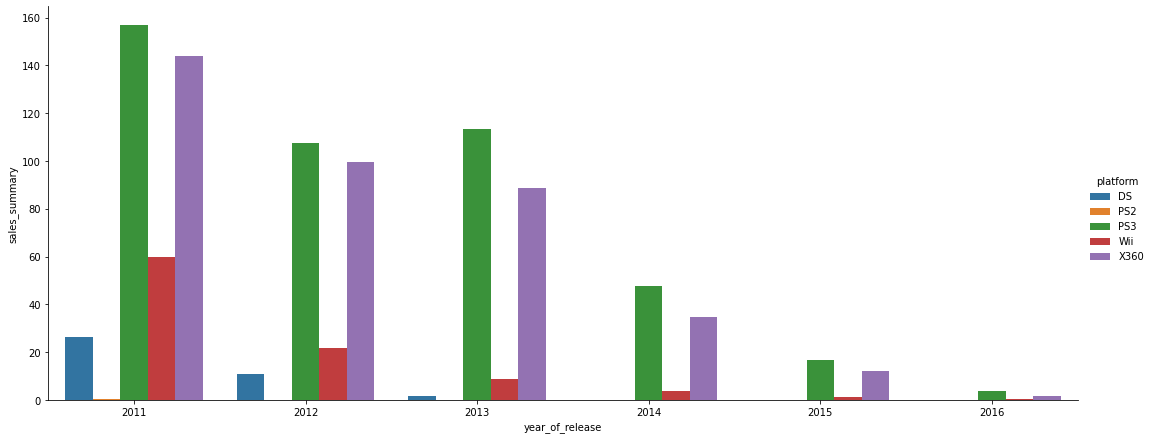

In [30]:
#Выбор лидирующих платформ 2м способом:
platforms = data.groupby('platform')['sales_summary'].sum().sort_values(ascending=False)
plats = platforms.index[0:6]
plat_pivot = data[(data['platform'].isin(plats))&(data['year_of_release'] > 2010)].pivot_table(index=['platform','year_of_release'],values='sales_summary', aggfunc='sum').sort_index().reset_index()
sns.catplot(x="year_of_release", y="sales_summary", hue="platform", kind="bar", data=plat_pivot, height=6, aspect=2.5);

In [31]:
data_years = data.query('2017 > year_of_release > 2011')
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']
top5_platform = data_years.query('platform in @top5_platform_name').groupby('platform')['sales_summary'].sum().sort_values(ascending=False).reset_index()
top5_platform

,platform,sales_summary
0,PS4,314.14
1,3DS,194.61
2,XOne,159.32
3,WiiU,82.19
4,PSV,49.18


In [32]:
#сравним показатели , которые мы вывели по графику и которые получаются по группировке:
data_platforms_5 = data.query('2017 > year_of_release > 2011').groupby(['platform']).agg({'sales_summary':'sum'}).sort_values(by='sales_summary',ascending=False)\
.reset_index()
data_platforms_5.head(5)

,platform,sales_summary
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


(0.0, 1.25)

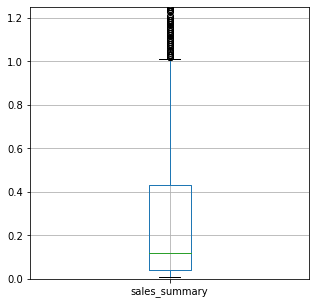

In [33]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам по актуальному периоду
data_years.boxplot('sales_summary', figsize=(5,5))
plt.ylim(0,1.25)

In [34]:
data_years['sales_summary'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: sales_summary, dtype: float64

In [35]:
data_actual_5 = data_years.query('platform in @top5_platform_name')
display (data_actual_5.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_summary
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


<AxesSubplot:>

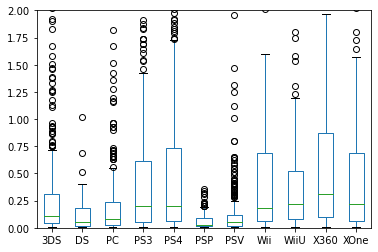

In [36]:
data_years.pivot_table(index = 'name', columns = 'platform', values = 'sales_summary', aggfunc = 'sum').plot(kind='box',ylim=(0,2))

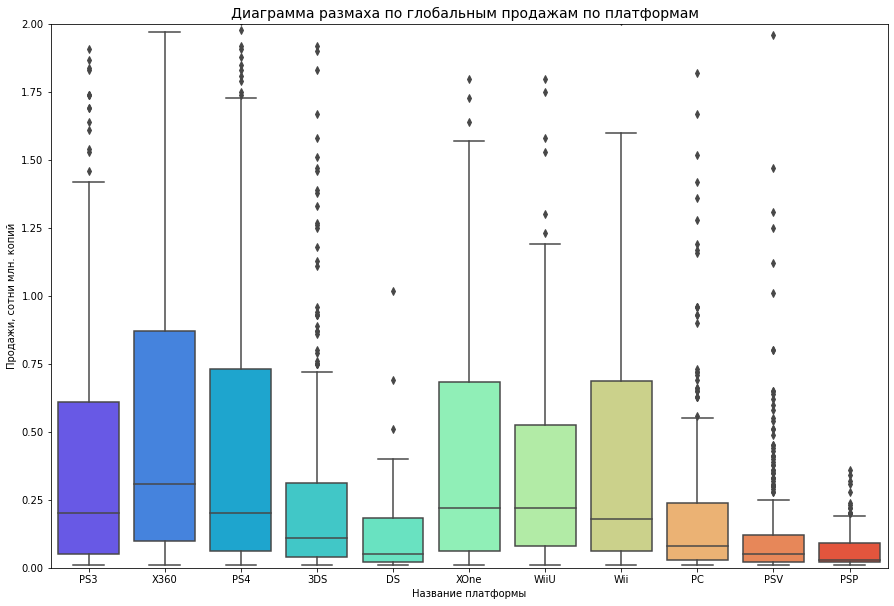

In [37]:
#"Ящик с усами" по глобальным продажам за весь период по каждой перспективной платформе: 
plt.figure(figsize=(15, 10))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="sales_summary", data = data_years, palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам по платформам  ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы');

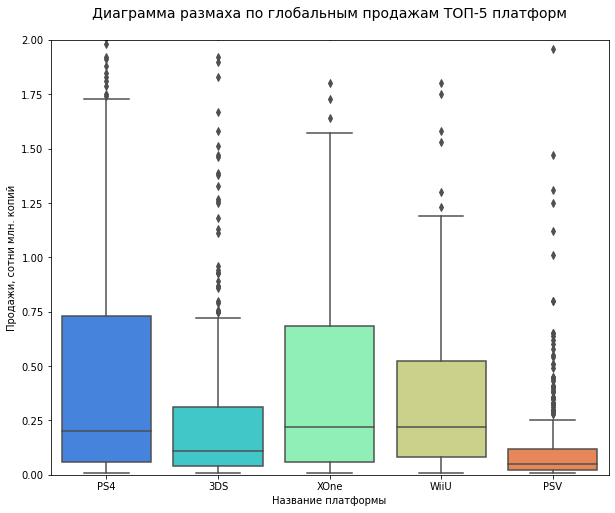

In [38]:
#"Ящик с усами" по глобальным продажам за актуальный период по каждой перспективной платформе: 
plt.figure(figsize=(10, 8))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="sales_summary", data = data_actual_5 , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам ТОП-5 платформ\n  ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы');

##### Вывод по "ящику с усами" по продаже глобальный игр в разбивке по платформам:
Лидером продаж является платформа PS4 (Play_Station_4), которая имеет размах продаж по годам у нее самый большой.
PSV является самой непопулярной платформой, но и самой стабильной - размах самый узкий. Среднее число продаж игр для десктопов самое низкое и доля бестселлеров самая маленькая.
PlayStation 4 и XBox one - это видно и по большему среднему значению числа продаж. Выбросы на боксплотах - это какие-то суперопулярные игры. Сравним 3DS и XOne. У первого маленький ящик и много выбросов. Это говорит о том, что большая часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты:</font>
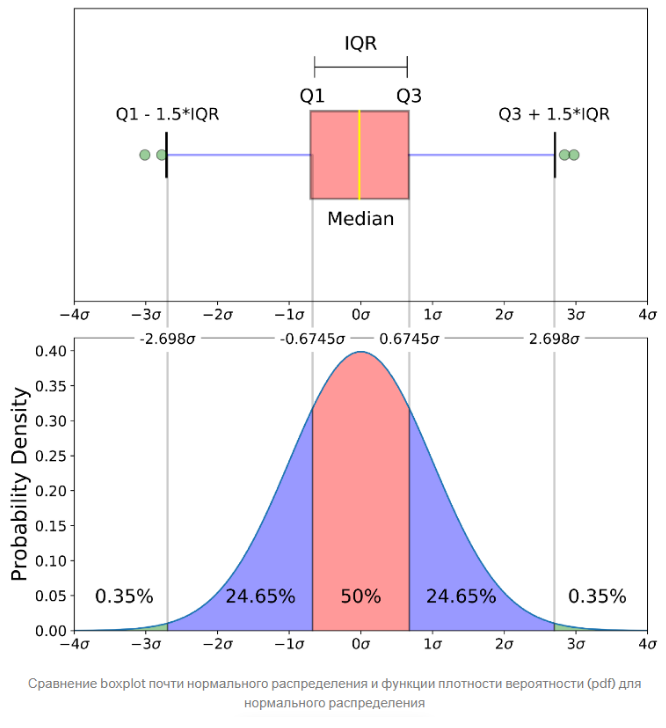

In [39]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
platforma_XOne = data_years.query('platform == "XOne"')
platforma_XOne = platforma_XOne[['critic_score', 'user_score', 'sales_summary']]
display(platforma_XOne.head(5))

,critic_score,user_score,sales_summary
99,NaN,NaN,7.39
165,97.0,7.9,5.47
179,81.0,5.4,5.26
242,84.0,6.4,4.49
270,88.0,6.2,4.22


In [40]:
# Комментарий ревьюера
data.year_of_release.min()

1980

In [41]:
# Комментарий ревьюера 2
data_years.year_of_release.min()

2012

In [42]:
#Решила еще одну платформу посмотреть, так как она более популярная- PS4:
platforma_PS4 = data_years.query('platform == "PS4"')
platforma_PS4 = platforma_PS4[['critic_score', 'user_score', 'sales_summary']]
display(platforma_PS4.head(5))

,critic_score,user_score,sales_summary
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


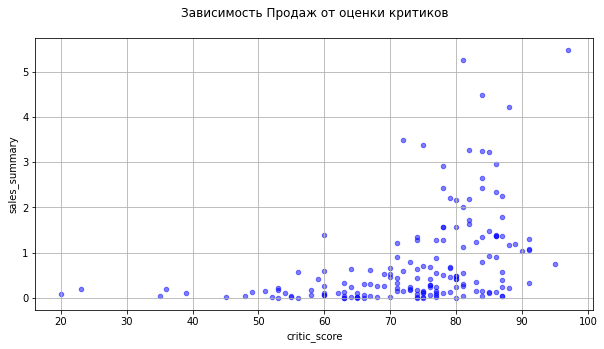

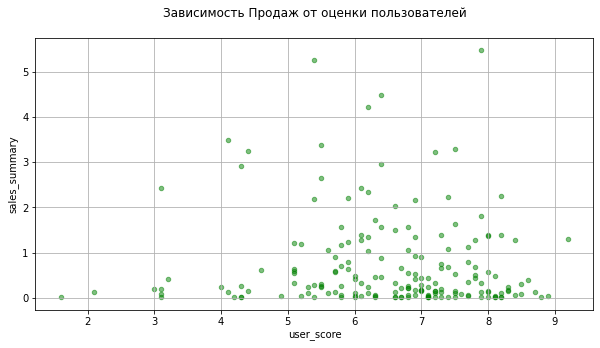

In [43]:
#Построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами платформы XOne :
#1.диаграмма рассеивания медлу отзывами критиков и продажами:
platforma_XOne.plot(kind='scatter', x='critic_score', y='sales_summary', figsize=(10,5), color='b', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков\n  ');
#2.диаграмма рассеивания между оценками пользователей и продажами:
platforma_XOne.plot(kind='scatter', x='user_score', y='sales_summary', figsize=(10,5), color='g', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки пользователей\n  ');

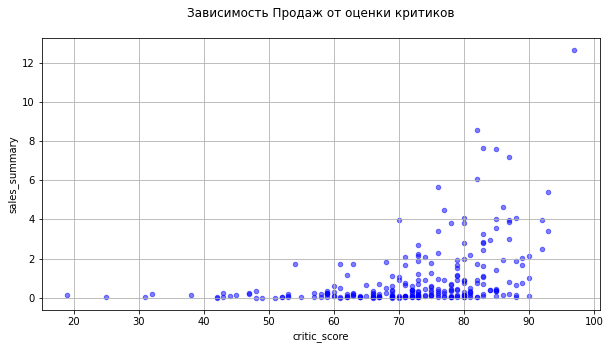

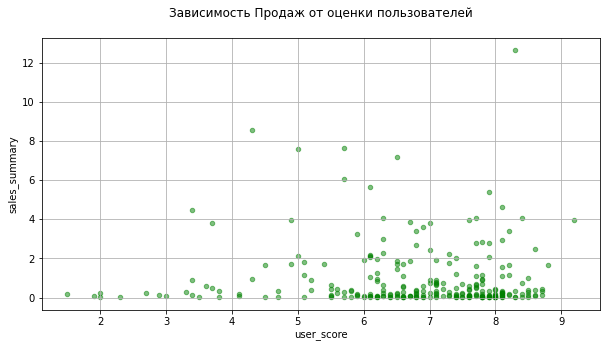

In [44]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами платформы PS4, т.к. она более популярна:
#1.диаграмма рассеивания медлу отзывами критиков и продажами:
platforma_PS4.plot(kind='scatter', x='critic_score', y='sales_summary', figsize=(10,5), color='b', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков\n  ');
#2.диаграмма рассеивания между оценками пользователей и продажами:
platforma_PS4.plot(kind='scatter', x='user_score', y='sales_summary', figsize=(10,5), color='g', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки пользователей\n  ');

In [45]:
#Найдем корреляцию "Зависимость Продаж от оценки критиков":
data_years['user_score'].unique()

array([8.2, 8.1, nan, 5.3, 4.8, 8.3, 2.6, 7.2, 7. , 8.7, 4.3, 6.6, 5.7,
       5. , 6.5, 9.1, 7.3, 6.9, 6.1, 7.9, 6.7, 5.4, 4. , 8.4, 6.4, 3.4,
       8.5, 9. , 4.9, 4.5, 6.2, 4.2, 6.3, 7.7, 9.2, 7.6, 3.7, 4.1, 5.8,
       5.6, 6.8, 5.5, 7.5, 4.4, 5.9, 8.9, 3.9, 8.6, 7.8, 3.2, 8. , 3.1,
       7.4, 6. , 4.7, 7.1, 8.8, 5.1, 3.5, 3. , 2.9, 2.7, 2.2, 5.2, 3.8,
       4.6, 3.3, 9.3, 1.6, 3.6, 2.4, 2.8, 1.8, 1.7, 2.1, 2. , 1.5, 0.7,
       2.5, 0.2, 1.9, 1.3, 1. , 1.4, 2.3])

In [46]:
platforma_PS4.corr()

,critic_score,user_score,sales_summary
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sales_summary,0.406568,-0.031957,1.000000


In [47]:
platforma_XOne.corr()

,critic_score,user_score,sales_summary
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
sales_summary,0.416998,-0.068925,1.000000


##### Вывод по оценке корреляции платформы PS4:
Корреляция платформы PS4, показывает что продажи связаны оценкой критиков на коэффициента (0.41)и практически нет никакой линейной связи с оценкой пользователей (- 0.032). Линейная взаимосвязь между продажами. А взаимосвязь между оценкой критиков и оценкой пользователей (0.56) совсем небольшая

##### Вывод по оценке корреляции платформы Хоne:
Корреляция платформы XOne аналогично, показывает что продажи связаны оценкой критиков на коэффициента (0.42) и практически нет никакой линейной
связи с оценкой пользователей (- 0.069). Линейная взаимосвязь между продажами.
А взаимосвязь между оценкой критиков и оценкой пользователей (0.47)- совсем небольшая

In [48]:
#Соотнесем выводы с продажами игр на других платформах:
#рассчитаем корреляцию на других платформах:
display("Корреляция платформы 3DS:",data_years.query('platform == "3DS"')[['critic_score', 'user_score', 'sales_summary']].corr().round(2))
display("Корреляция платформы WiiU:",data_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'sales_summary']].corr().round(2))
display("Корреляция платформы PSV:",data_years.query('platform == "PSV"')[['critic_score', 'user_score', 'sales_summary']].corr().round(2))

'Корреляция платформы 3DS:'

,critic_score,user_score,sales_summary
critic_score,1.00,0.72,0.32
user_score,0.72,1.00,0.20
sales_summary,0.32,0.20,1.00


'Корреляция платформы WiiU:'

,critic_score,user_score,sales_summary
critic_score,1.00,0.77,0.35
user_score,0.77,1.00,0.40
sales_summary,0.35,0.40,1.00


'Корреляция платформы PSV:'

,critic_score,user_score,sales_summary
critic_score,1.00,0.7,0.09
user_score,0.70,1.0,-0.00
sales_summary,0.09,-0.0,1.00


##### Вывод по другим платформам коэффициента корреляции:
По оценке корреляции других платформ, коэффициент корреляции показывает , что взаимосвязь между оценкой пользователей и оценкой критиков увеличивается и стремиться к 1 (0.75,0.77, 0.73). Зато уменьшилась взаимосвязь по продажам и оценкой критиков, была 0.42 , а стало (0.35, 0.35, 0.13)

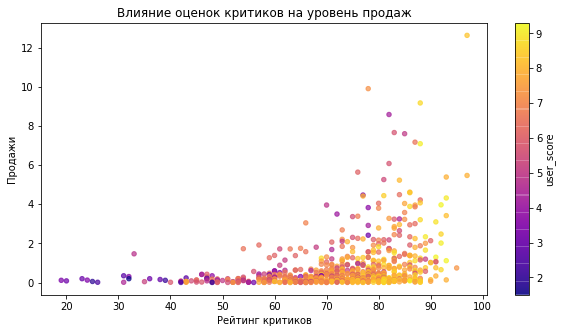

In [49]:
data_actual_5.plot.scatter('critic_score',  'sales_summary', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show();

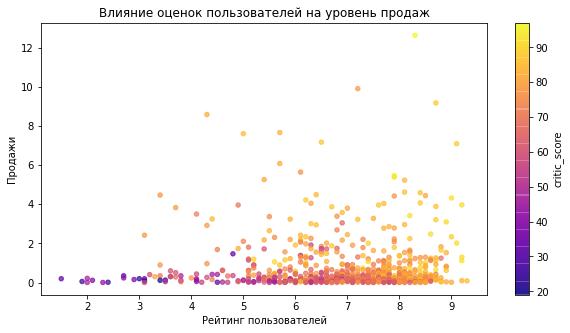

In [50]:
data_actual_5.plot.scatter('user_score', 'sales_summary', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show();

Wii


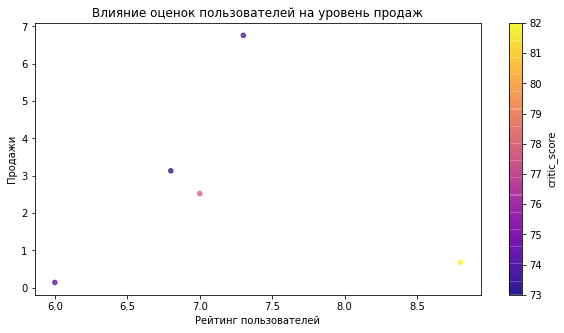

Корреляция между оценкой критиков и продажами: -0.42
Корреляция между оценкой пользователей и продажами: 0.3
Корреляция между оценками критиков и пользователей: 0.82
------------------------------------------------------------
3DS


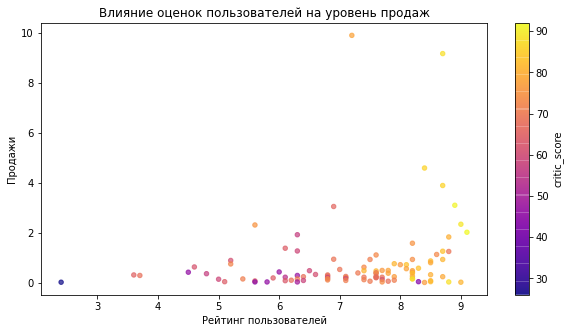

Корреляция между оценкой критиков и продажами: 0.32
Корреляция между оценкой пользователей и продажами: 0.2
Корреляция между оценками критиков и пользователей: 0.72
------------------------------------------------------------
PC


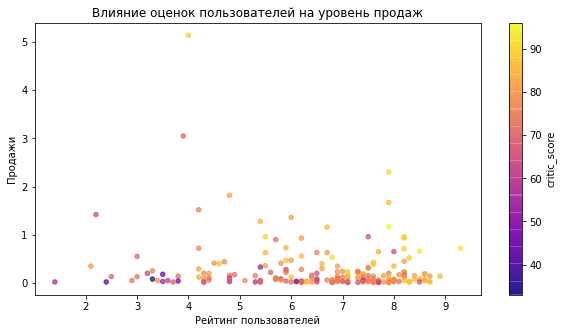

Корреляция между оценкой критиков и продажами: 0.24
Корреляция между оценкой пользователей и продажами: -0.12
Корреляция между оценками критиков и пользователей: 0.43
------------------------------------------------------------
X360


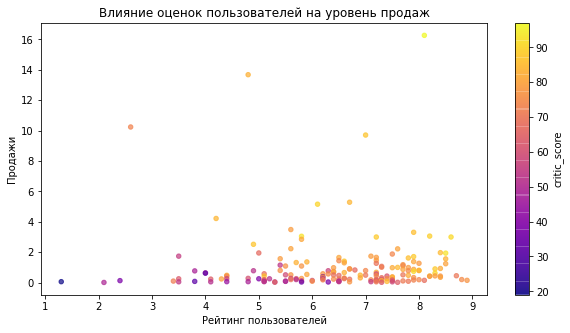

Корреляция между оценкой критиков и продажами: 0.36
Корреляция между оценкой пользователей и продажами: 0.0062
Корреляция между оценками критиков и пользователей: 0.56
------------------------------------------------------------
PS3


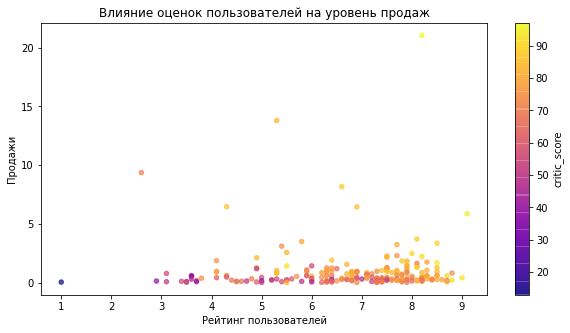

Корреляция между оценкой критиков и продажами: 0.33
Корреляция между оценкой пользователей и продажами: -0.0051
Корреляция между оценками критиков и пользователей: 0.54
------------------------------------------------------------


In [51]:
for p in ["Wii", "3DS", "PC", "X360","PS3"]:
    print(p)
    data_select = data_years.query('platform == @p').plot.scatter('user_score', 'sales_summary', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
    plt.xlabel('Рейтинг пользователей')
    plt.ylabel('Продажи')
    plt.title('Влияние оценок пользователей на уровень продаж')
    plt.show();
#for p in ["Wii", "3DS", "PC", "X360","PS3"]:  
    #print(p)
    data_select = data_years.query('platform == @p')
    print(f'Корреляция между оценкой критиков и продажами: {data_select.critic_score.corr(data_select.sales_summary):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data_select.user_score.corr(data_select.sales_summary):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {data_select.critic_score.corr(data_select.user_score):.2}')
    print('--' * 30)

##### Вывод по диаграммам рассеивания и корреляции платформ ("Wii", "3DS", "PC", "X360","PS3"):
Значения корреляций отличаются, но общий тренд есть.
Корреляция между оценкой критиков и продажами: не превышает 0.33
Корреляция между оценкой пользователей и продажами: не превышает 0.3
Корреляция между оценками критиков и пользователей: не превышает 0.82
Это говорит, что связь между критиками и продажами по этим платформам не стремиться к 1 следовательно совсем маленькая.
Связь между оценкой пользователей и продажами еще меньше.Возможно, это связано и с тем, что далеко не все пользователи пишут отзывы и оставляют оценки.
Зато связь между оценкой пользователей и оценкой критикой явно существует - максимальный показатель 0.82. 

#### Анализ распределения игр по жанрам:

In [52]:
#общее распределение актуальных игр по жанрам:
data_years['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [53]:
#Найдем прибыльные жанры по актульаным годам:
data_genre = data_years.groupby(['genre']).agg({'sales_summary':'sum'})
data_genre.sort_values(by = 'sales_summary', ascending=False)

,sales_summary
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [54]:
#популярные платформы:
data_genre_5 = ['Action','Shooter','Role-Playing','Sports','Misc']
data_genre_5 

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']

<AxesSubplot:title={'center':'Распределение по жанрам и количествам продаж'}, xlabel='genre'>

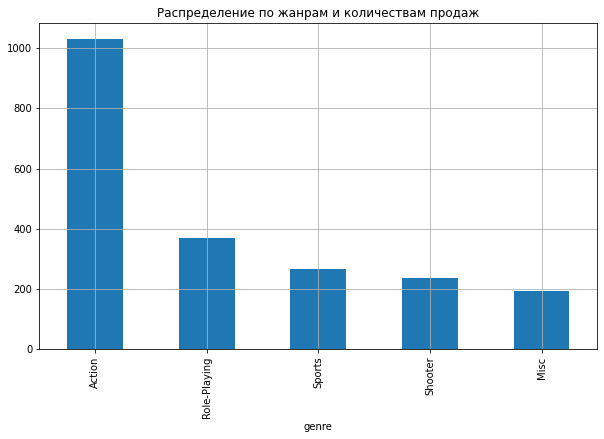

In [55]:
genre_top_5 = data_years.query('genre in @data_genre_5')
data_genre_top_5=genre_top_5.groupby('genre')['sales_summary'].count().sort_values(ascending=False)
data_genre_top_5.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Распределение по жанрам и количествам продаж')


<AxesSubplot:title={'center':'Распределение по жанрам и количествам продаж'}, xlabel='genre'>

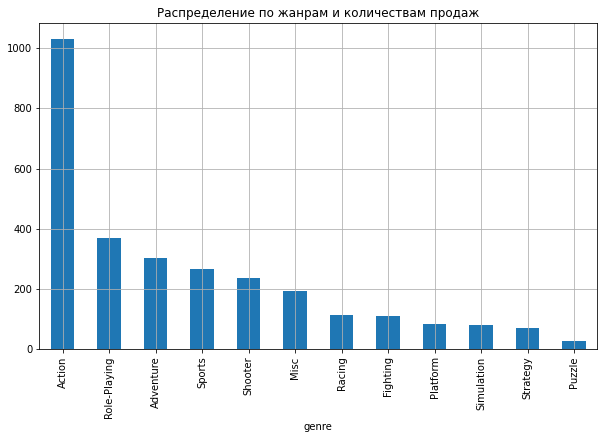

In [56]:
#data_genre_count = data_years.groupby(['genre']).agg({'sales_summary': 'count'})
data_count_genre=data_years.groupby('genre')['sales_summary'].count().sort_values(ascending=False)
data_count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Распределение по жанрам и количествам продаж')


##### Вывод игр по жанрам:
Что касается игр по жанрам, то самые продаваемые игры:
Action - 441.12и;
Shooter - 304.73;
Role-Playing - 192.80;
Sports - 181.07;
Misc - 85.04;
Самая непродаваяемы игра : "Puzzle"

<AxesSubplot:title={'center':'Распределение по жанрам и глобальных медианных продаж'}, xlabel='genre'>

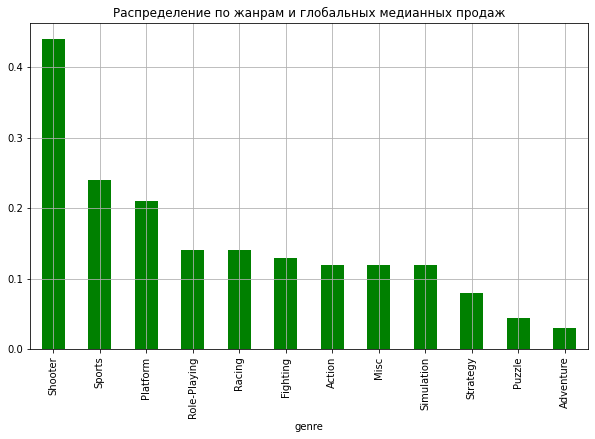

In [57]:
median_sale_genre = data_years.groupby('genre')['sales_summary'].median().sort_values(ascending=False)
median_sale_genre.plot(y='genre',grid=True,color = 'g',figsize=(10,6),kind='bar',title='Распределение по жанрам и глобальных медианных продаж')

##### Вывод по жанрам и медианным продажам:
Что касается выручки от продаж, то тут самым высоким является жанр 'Shooter', 'platform', 'sport'. Тогда как самый покупаемый жанр Action немного ниже. Меньше всего выручки у жанра Adventure.
По выручке прибыль рассчитывали на основании медианных значений, поэтому сказать , что это точные данные по продажам жанров не можем.

#### Вывод по исследовательскому анализу:
Провели анализ по актуальному периоду, который начинается с 2012 по 2016 года: 
Самые популярные платформы в период с 2012 по 2016 год - это PS4, 3DS, XOne, WiiU, PSV.
Проверили коэффициент корреляции по топ 5 платформам и обнаружили, что оценка критиков и оценка пользователей не оказывают линейного воздействия в целом на объемы продаж.
Но взаимосвязь корреляции оценки критиков и оценки пользователей существует между собой с коэффициентом 0.7.
Также провели исследование по жанрам и вывод самый популярный жанр Action, а самый продаваемый Shooter, а не рекомендуемый Puzzle и Adventure.


### Составление портрета пользователя каждого региона

In [58]:
data_years.describe()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_summary
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,1312.000000,1531.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,72.258384,6.636120,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,12.687087,1.569033,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


In [59]:
#Проанализируем платформы по продажам в отдельности и общие по актуальному периоду:
data_every_sales = data_years.groupby(['platform']).agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','sales_summary':'sum'})
data_every_sales.sort_values(by=['sales_summary','na_sales','eu_sales','jp_sales','other_sales'],ascending=False).head(10)

,na_sales,eu_sales,jp_sales,other_sales,sales_summary
platform,,,,,
PS4,108.74,141.09,15.96,48.35,314.14
PS3,103.38,106.86,35.29,43.26,288.79
X360,140.05,74.52,1.57,20.40,236.54
3DS,55.31,42.64,87.79,8.87,194.61
XOne,93.12,51.59,0.34,14.27,159.32
WiiU,38.10,25.13,13.01,5.95,82.19
PC,19.12,37.76,0.00,5.77,62.65
PSV,10.98,11.36,21.04,5.80,49.18
Wii,17.45,11.92,3.39,2.61,35.37


In [60]:
#Определим для пользователя каждого региона (NA, EU, JP):
#Самые популярные платформы (топ-5). Опишите различия в долях продаж
data_every_sales_na = data_actual_5.groupby(['platform']).agg({'na_sales':'sum','sales_summary':'sum'})
data_actual_sales_na = data_years.groupby(['platform']).agg({'na_sales':'sum','sales_summary':'sum'})
print ("Самые популярные платформы в Северной Америки:")
data_every_sales_na.sort_values(by=['na_sales'],ascending=False)

Самые популярные платформы в Северной Америки:


,na_sales,sales_summary
platform,,
PS4,108.74,314.14
XOne,93.12,159.32
3DS,55.31,194.61
WiiU,38.10,82.19
PSV,10.98,49.18


In [61]:
data_every_sales_eu = data_actual_5.groupby(['platform']).agg({'eu_sales':'sum','sales_summary':'sum'})
data_actual_sales_eu = data_years.groupby(['platform']).agg({'eu_sales':'sum','sales_summary':'sum'})
print ("Самые популярные платформы Европы:")
data_every_sales_eu.sort_values(by=['eu_sales'],ascending=False)

Самые популярные платформы Европы:


,eu_sales,sales_summary
platform,,
PS4,141.09,314.14
XOne,51.59,159.32
3DS,42.64,194.61
WiiU,25.13,82.19
PSV,11.36,49.18


In [62]:
data_every_sales_jp = data_actual_5.groupby(['platform']).agg({'jp_sales':'sum','sales_summary':'sum'})
data_actual_sales_jp = data_years.groupby(['platform']).agg({'jp_sales':'sum','sales_summary':'sum'})
print ("Самые популярные платформы Японии:")
data_every_sales_jp.sort_values(by=['jp_sales'],ascending=False)

Самые популярные платформы Японии:


,jp_sales,sales_summary
platform,,
3DS,87.79,194.61
PSV,21.04,49.18
PS4,15.96,314.14
WiiU,13.01,82.19
XOne,0.34,159.32


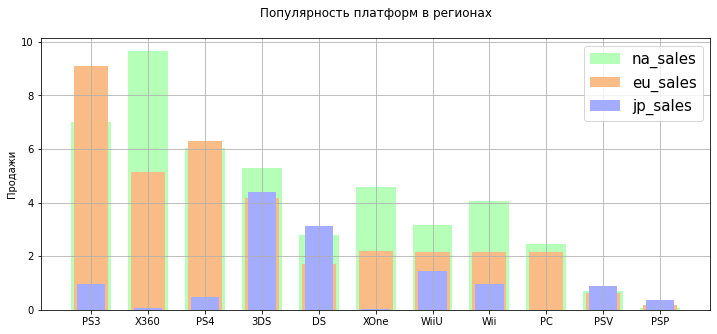

In [63]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

#Задаём переменные 
x = list(data_years['platform'])
y1 = data_years['na_sales']
y2 = data_years['eu_sales']
y3 = data_years['jp_sales']

#Строим графики
ax.bar(x, y1, 0.7, label='na_sales', color = '#b5ffb9')
ax.bar(x, y2, 0.6, label='eu_sales', color = '#f9bc86')
ax.bar(x, y3, 0.5, label='jp_sales', color = '#a3acff')

#Оформляем  
ax.set_title('Популярность платформ в регионах\n  ')
ax.set_ylabel('Продажи')
ax.grid()
ax.legend(fontsize=15)

plt.show();


#### Вывод по портрету пользователя каждого региона:
В каждом регионе разные платформы пользуются популярностью, получается ,в Европе самая популярная платформа - PS3, затем PS4, X360.
Cамая популярная платформа в Северной Америке: X360, затем WIii, Xone.
Cамая популярная платформа в Японии: 3DS, DS, WiiU.
Европа и Северная америка - у них есть схожие платформы по популярности в связи с удаленностью регионов друг от друга и с численностью населения.
Япония отличается от других регионов, так как маленькая страна, и другое развитие, поэтому и другой вид платформ пользуется популярностью.

#### Самые популярные платформы (топ-5)

доля топ 5 платформ в Северной Америке:
доля топ платформ в Северной Америке:


<AxesSubplot:ylabel='% sales'>

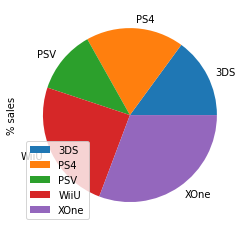

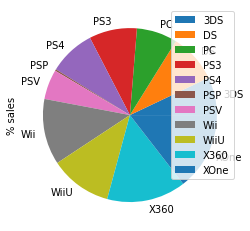

In [64]:
#посмотрим нагляднее по долям продажи платформ топ 5:
data_every_sales_na['% sales']=data_every_sales_na['na_sales']/data_every_sales_na['sales_summary']
print('доля топ 5 платформ в Северной Америке:')
data_every_sales_na.plot(kind='pie',y="% sales")
#И сравним с платформами за актуальный период :

data_actual_sales_na['% sales']=data_actual_sales_na['na_sales']/data_actual_sales_na['sales_summary']
print('доля топ платформ в Северной Америке:')
data_actual_sales_na.plot(kind='pie',y="% sales")

##### Вывод по распределению платформ в Северной Америке: 
Данные по Северной Америке с топ 5 и с топовыми платформами немного разнятся, из-за того, что в Общем платформа X360 не востребована нигде так, как в Северной Америке. В Северной Америке лидирующее позиция у платформы XOne из топ 5 , и вообщем второе место -платформа Xone занимает по востребованию.

доля топ 5 платформ в Европе:
доля топ платформ в Европе:


<AxesSubplot:ylabel='% sales'>

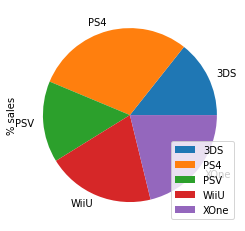

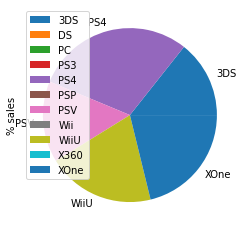

In [65]:
data_every_sales_eu['% sales']=data_every_sales_eu['eu_sales']/data_every_sales_eu['sales_summary']
print('доля топ 5 платформ в Европе:')
data_every_sales_eu.plot(kind='pie',y="% sales")

data_actual_sales_eu['% sales']=data_every_sales_eu['eu_sales']/data_every_sales_eu['sales_summary']
print('доля топ платформ в Европе:')
data_actual_sales_eu.plot(kind='pie',y="% sales")

##### Вывод по распределению платформ в Европе:
В Европе распределение долей более равномерное, и сходятся данные в общем распределении платформ и по платформам топ 5.

доля топ 5 платформ в Японии:
доля платформ в Японии:


<AxesSubplot:ylabel='% sales'>

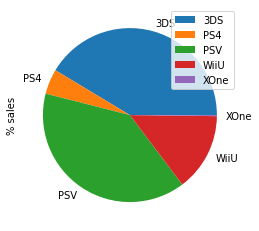

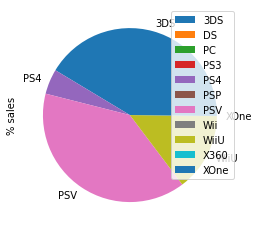

In [66]:
data_every_sales_jp['% sales']=data_every_sales_jp['jp_sales']/data_every_sales_jp['sales_summary']
print('доля топ 5 платформ в Японии:')
data_every_sales_jp.plot(kind='pie',y="% sales")

data_actual_sales_jp['% sales']=data_every_sales_jp['jp_sales']/data_every_sales_jp['sales_summary']
print('доля платформ в Японии:')
data_actual_sales_jp.plot(kind='pie',y="% sales")


##### Вывод по распределению платформ в Японии:
В Японии данные схожи топ 5 и общие популярные платформы. Более востребованная платформа PSV и 3DS.

#### Самые популярные жанры (топ-5)

In [67]:
#Найдем самые популярные жанры (топ-5):
data_genre_na = data_years.groupby(['genre']).agg({'na_sales':'sum','sales_summary':'sum'})
print ("Самые популярные жанры в Северной Америки:")
data_genre_na.sort_values(by=['na_sales'],ascending=False).head(5)

Самые популярные жанры в Северной Америки:


,na_sales,sales_summary
genre,,
Action,177.84,441.12
Shooter,144.77,304.73
Sports,81.53,181.07
Role-Playing,64.00,192.80
Misc,38.19,85.04


In [68]:
data_genre_eu = data_years.groupby(['genre']).agg({'eu_sales':'sum','sales_summary':'sum'})
print ("Самые популярные жанры Европы:")
data_genre_eu.sort_values(by=['eu_sales'],ascending=False).head(5)

Самые популярные жанры Европы:


,eu_sales,sales_summary
genre,,
Action,159.34,441.12
Shooter,113.47,304.73
Sports,69.09,181.07
Role-Playing,48.53,192.80
Racing,27.29,53.50


In [69]:
data_genre_jp = data_years.groupby(['genre']).agg({'jp_sales':'sum','sales_summary':'sum'})
print ("Самые популярные жанры Японии:")
data_genre_jp.sort_values(by=['jp_sales'],ascending=False).head(5)

Самые популярные жанры Японии:


,jp_sales,sales_summary
genre,,
Role-Playing,65.44,192.80
Action,52.80,441.12
Misc,12.86,85.04
Simulation,10.41,35.12
Fighting,9.44,44.49


<AxesSubplot:ylabel='jp_sales'>

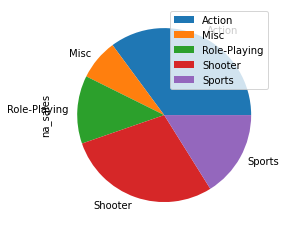

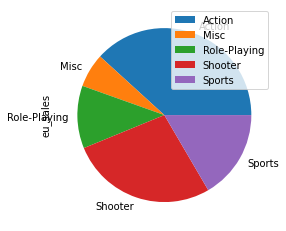

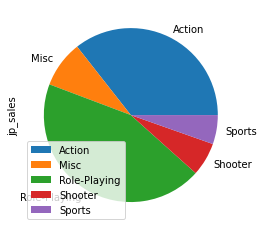

In [70]:
data_genre_na_5 = genre_top_5.groupby(['genre']).agg({'na_sales':'sum','sales_summary':'sum'})
data_genre_na_5.plot(kind='pie',y="na_sales")
data_genre_eu_5 = genre_top_5.groupby(['genre']).agg({'eu_sales':'sum','sales_summary':'sum'})
data_genre_eu_5.plot(kind='pie',y="eu_sales")
data_genre_jp_5 = genre_top_5.groupby(['genre']).agg({'jp_sales':'sum','sales_summary':'sum'})
data_genre_jp_5.plot(kind='pie',y="jp_sales")

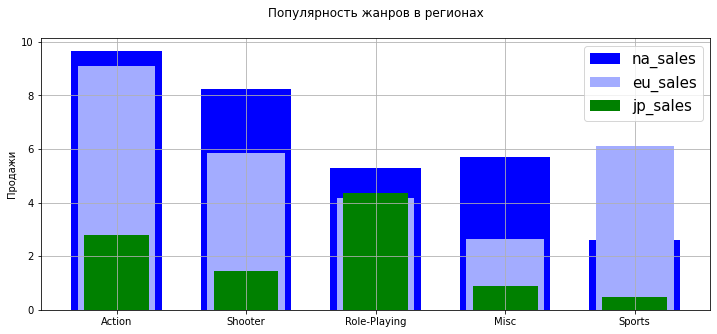

In [71]:
#Построим общий график популярности жанров по регионам:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

#Задаём переменные 
x = list(genre_top_5['genre'])
y1 = genre_top_5['na_sales']
y2 = genre_top_5['eu_sales']
y3 = genre_top_5['jp_sales']

#Строим графики
ax.bar(x, y1, 0.7, label='na_sales', color = 'b')
ax.bar(x, y2, 0.6, label='eu_sales', color = '#a3acff')
ax.bar(x, y3, 0.5, label='jp_sales', color = 'g')

#Оформляем  
ax.set_title('Популярность жанров в регионах\n  ')
ax.set_ylabel('Продажи')
ax.grid()
ax.legend(fontsize=15)

plt.show();


##### Вывод по жанрам:
Самая популярная игра Action в Северной Америке и Европе, в Японии - самая популярная игра жанра -Role- Playing. Все таки отличается ментальность стран и культура.

#### Влияние рейтинга ESRB на продажи в отдельных регионах

Рассмотрим: влияет ли рейтинг ESRB на продажи в отдельном регионе: Насколько мне известно рейтинг ESRB - это негосударственная коммерческая организация, которой присваивается определенный рейтинг видеоигр. Расшифровка рейтингов: E - everyone - для всех E10+ - для всех старше 10 лет EC - для детей младшего возраста M - от 17 лет RP - рейтинг ожидается T- подросток, от 13ти лет и старше АО - только для взрослых.

In [72]:
#Добавление предобработки данных по рейтингам ESRB, т.к. нужен дополнительных анализ по регионам:
data['rating'].describe()
data[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_summary
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


In [73]:
data.pivot_table(index='rating',values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,703.87,197.96,1274.24
E10+,183.35,40.20,345.50
EC,0.11,0.00,1.53
K-A,0.27,1.46,2.56
M,480.00,63.58,742.89
RP,0.03,0.00,0.00
T,421.79,150.70,747.60


Пропуски в рейтинге ESRB заменим на аббревиатуру NaN - не определен. Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E":

In [74]:
data['rating'] = data['rating'].fillna(value='NaN')
data['rating'] = data['rating'].replace('K-A', 'E')
print(data['rating'].isna().sum())
#вспомним, чтобы данные были актуальные:
data_years = data.query('2017 > year_of_release > 2011')

0


In [75]:
data_rating = (data_years
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          )
data_rating.head(5)

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
NaN,91.50,108.84,103.31
T,52.96,26.02,66.02


In [76]:
data_years.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
2,M,231.57
0,E,114.37
3,NaN,103.31
1,E10+,75.70
4,T,66.02


In [77]:
data_years.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
2,M,193.96
0,E,113.03
3,NaN,91.50
1,E10+,55.37
4,T,52.96


In [78]:
data_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
3,NaN,108.84
0,E,28.33
4,T,26.02
2,M,21.20
1,E10+,8.19


<AxesSubplot:xlabel='rating'>

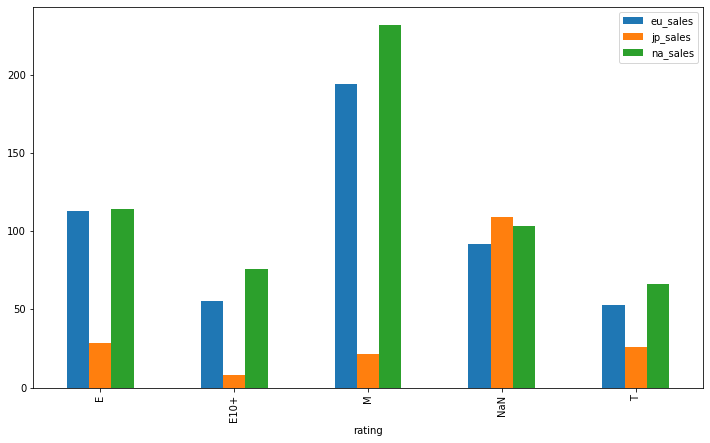

In [79]:
data_rating.plot(kind='bar', figsize = (12,7))


##### Вывод по рейтингу ESRB на продажи в отдельном регионе:
Судя по всему, большей популярностью игр пользуются взрослые от 17ти лет , еще обще-популярный рейтинг - игры для всех.
Есть еще неопределенный рейтинг, который лидирует в Японии. Допустим , что это возврастная группа  , которая старше 17-ти лет. Так как по жанру, в Японии лидирует жанр- "Role-Playing". 
Рейтинги распределяются по регионам, и в Японии самую большую часть продаж приходится на рейтинг, который не определен по глобальному уровню, но у них пользуется популярностью.

#### Вывод по портрету пользователя и  топ 5 платформам:
Анализируя будующие продажи на 2017 год можно преподложить, что:

Платформы 3DS, PSV, PS4, XOne, X360, Wiii - наиболее популярны, если смотреть по регионам, то платформа X360 подходит практически только для Северной Америки;

Жанры популярные жанры -  это Action, Shooter, Role_playing, Sports, Misc. При том, что популярность жанров отличается в Северной Америке, и Японии, в Японии популярный жанр - Role_playing, а в Америке - Action;

По рейтингу - самый востребованный рейтинг для возраста старше 17ти лет, и для всех возврастов, что в итоге, дает возможность попадать подросткам под эту категорию (с 12ти до 19ти лет).


In [80]:
# Комментарий ревьюера
temp = data_years.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


NaN     1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

### Проверка гипотез:

#### Средние пользовательские рейтинги платформ Xbox One  (Xone) и PC одинаковые:

In [81]:
#Сформируем данные для проверки гипотезы:
xone = data_years.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = data_years.query(' platform == "PC" ')['user_score'].dropna().to_list()

#Рассчитаем средние значения:
xone_mean = data_years.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = data_years.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One (Xone): {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One (Xone): 6.52
Средний пользовательский рейтинг PC: 6.4


In [82]:
#Рассчитаем дисперсии:
print('Дисперсия XOne =', np.var(xone))    
print('Дисперсия PC =',  np.var(pc))

Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.7569952398906588


Сформулируем гипотезы:
H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1: средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

  Когда генеральных совокупностей две, бывает нужно сопоставить их
средние. Чтобы проверить гипотезу о равенстве среднего двух
генеральных совокупностей по взятым из них выборкам, применим
метод scipy.stats.ttest_ind():
Методу передаем параметры: array1 , array2
— массивы, содержащие выборки; equal_var — необязательный
параметр, задающий считать ли равными дисперсии выборок. Если есть
основание полагать, что выборки взяты из схожих по параметрам
совокупностей, тогда укажим equal_var = True , и дисперсия каждой
выборки будет оценена по объединенному датасету из двух выборок, а не
для каждой по отдельности по значениям в ней самой.

In [83]:
alpha = .05

results = st.ttest_ind(
    xone, 
    pc,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


##### Вывод "Средние пользовательские рейтинги платформ Xbox One (Xone) и PC одинаковые":
Не получилось отвергнуть нулевую гипотезу, т.к. данные по рейтингу Xbox и PC - примерно схожи по значениям рейтинга:
Средний пользовательский рейтинг Xbox One (Xone): 6.52
Средний пользовательский рейтинг PC: 6.5

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

In [84]:
#Сформируем данные для проверки гипотезы
action = data_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = data_years.query('genre == "Sports"')['user_score'].dropna().to_list()

#Рассчитаем средние значения
action_mean = data_years.query('genre == "Action"')['user_score'].mean()
sports_mean = data_years.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.83
Средний пользовательский рейтинг Sports: 5.5


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что показаны дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

In [85]:
#Рассчитаем дисперсии Action и Sports:
print('Дисперсия Action =', np.var(action))    
print('Дисперсия Sports =',  np.var(sports))

Дисперсия Action = 1.8854720340439224
Дисперсия Sports = 3.0073882971729127


Сформулируем гипотезы:
H0: cредние пользовательские рейтинги платформ Action и Sports одинаковые
H1: средние пользовательские рейтинги платформ Action и Sports разные
    Когда генеральных совокупностей две, бывает нужно сопоставить их
средние. Чтобы проверить гипотезу о равенстве среднего двух
генеральных совокупностей по взятым из них выборкам, применим
метод scipy.stats.ttest_ind():
Методу передаем параметры: array1 , array2
— массивы, содержащие выборки; equal_var — необязательный
параметр, задающий считать ли равными дисперсии выборок. 

In [86]:
alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


##### Вывод "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные": 
Отвергаем нулевую гипотезу, т.к. данные по жанрам Action и Sports разные.Что и доказывает данные по среднему рейтингу:
Средний пользовательский рейтинг Action: 6.78
Средний пользовательский рейтинг Sports: 5.7        

# Общий вывод:
Мы провели исследовательский анализ компьютерных игр:
(на основании открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы)
На основании наших исследований, мы сможем сделать ставку на рекламу определенных топовых игр в различных регионах.
Что мы исследовали и в чем провели предобработку:
- провели преобразование данных в нужные типы для анализа;
- обработали в таблице пропуски;
- посчитали суммарные продажи по регионам и добавили столбец;
- выявили актуальный период для будущего прогноза: актуальный период -  с 2012 по 2016 год;
- выбрали наиболее лидирующие платформы по продажам:'PS4', '3DS', 'XOne', 'WiiU', 'PSV';
- посмотрели влияние пользователей и критиков на продажу платформ с играми: в итоге особое влияние не оказывают.
- нашли коэффициенты корреляции влияния пользователей и критиков на продажу игр: по коэффициенту корреляции, взаимосвязаны влияние пользователей и критиков между собой;
- посмотрели распределение игр по жанрам и какие популярные жанры: 'Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc';
- составили портрет для каждого региона продаж, и выяснили , что Япония все-таки отличается от Америки по жанрам и по видам платформ, которые продаются. Поэтому прежде, чем выходить на рынок в другую страну, лучше проанализировать продажи предварительно;
- самые популярный жанры по регионам в целом : action, a платформа : PS3;
- по исследованиям рейтингов по регионам, наиболее играющая аудитория - это подростки, следовательно рейтинг старше 17ти лет и для всех возврастов пользуется популярностью и еще неизвестный рейтинг в Японии;
- по проверкам гипотез мы обнаружили:
     1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: "Не получилось отвергнуть нулевую гипотезу" -  рейтинги схожи;
     2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные: Отвергаем нулевую гипотезу, рейтинги не схожи;
Вывод: при планировании рекламы игр и продажи игр, лучше рассмотреть регионы поотдельности, и выявить общие платформы, жанры и рейтинги и на основании них планировать продажу игр.
